# Data preparation and transformation

**Prof. Michele Scarpiniti**


## Outline

- [Data preparation](#Data_preparation)
- [Pre-processing](#Preprocessing)
- [Feature selection](#Feature_selection)
- [Feature extraction](#Feature_extraction)
- [References](#References)

## Data preparation <a id="Data_preparation"></a>

After having understood how loading and manipulating data with Pandas it is now time to describe how **prepare** the data in order to fullfil the requirements of further analysis and exploration alsogrithms.

To this purpose, we first introduce the main *pre-processing* techniques available in the **Scikit-learn** library, such as normalization, standardization, and data imputation in order to have features ranging on a similar scale and mitigating the missing data issue.

Then, since some datasets present a **huge** number of features, resulting in a lower accuracy or inefficiency, we pass to introduce techniques to reduce the data *dimensionality*. These are divided into two families:

1. **feature selection**: a subset of the (**best**) features is selected;
	
2. **feature extraction**: the features are transformed in a **new** set of reduced dimensionality.


### Scikit-learn

**Scikit-learn** (see <https://scikit-learn.org/>) is a powerful, flexible and easy to use open source library for the implementation of high-performance machine learning algorithms. It features various classification, regression and clustering algorithms, including those for the dimensionality reduction, feature selection and evaluation metrics, along with many other characteristics.

Since the library has a huge number of functionalities, we can **import** a specific module(`module_name`) from the library:

or also a specific function (`function_name`) from a module:

**Scikit-learn** has **38** module classes implementing lots of useful functionalities. The **21** most important ones, are summarized in the following tables.

|  **Class**                |  **Description**                              |
|:--------------------------|:----------------------------------------------|
| **cluster**               | Implements many clustering approaches.        |
| **datasets**              | Useful famous datasets and related utilities. |
| **decomposition**         | Implements various decomposition algorithms.  |
| **discriminant_analysis** | Implements discriminant analysis approaches.  |
| **ensemble**              | Implements ensemble approaches.               |
| **feature_extraction**    | Methods for feature extraction.               |
| **feature_selection**     | Methods for feature selection.                |
| **impute**                | Implements methods for data imputation.       |
| **linear_model**          | Implements linear model algorithms.           |
| **manifold**              | Implements method of manifold learning.       |
| **metrics**               | Different metrics for model evaluation.       |
| **mixtures**              | Implements Gaussian Mixture Models.           |
| **model_selection**       | Methods for model selection.                  |
| **naive_bayes**           | Implements Na\:ive Bayes approaches.          |
| **neighbors**             | Implements nearest neighbors approaches.      |
| **neural_network**        | Implements neural networks approaches.        |
| **pipeline**              | Methods for constructing processing pipelines.|
| **preprocessing**         | Methods for data pre-processing.              |
| **svm**                   | Implements support vector machine approaches. |
| **tree**                  | Implements tree-based approaches.             |
| **utils**                 | A set of useful functionalities.              |

Here we are mainlyinterested in the **preprocessing** class.


Scikit-learn thinks data as a **table**: a two-dimensional grid of data, in which **rows** represent individual elements of the dataset (**instances** or **examples**) and the **columns** represents quantities related to each of these elements (**features**). 

For use in Scikit-learn, we will extract the features matrix `X` and target array `y` from the DataFrame representing the dataset. 

This can be done by using some of the Pandas DataFrame operations, after obtaining some simple datasets from Scikit-learn:

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

or, if needed, selecting only a **subset** of features and/or instances.

We can then **randomly** split this dataset into a *training* and a *test* sets with a given percentage by the following:

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=0)
print(X_train.shape)
print(X_test.shape)

(100, 4)
(50, 4)


### Basics of the Scikit-learn API

Scikit-learn is very **easy** to use. Most commonly, after **arranging** data into a features matrix `X` and target vector `y` and split in training and test sets, the steps in using the Scikit-learn estimator API are as follows:

1. **Choose** a class of  model by importing the appropriate *estimator* class from Scikit-learn:

2. **Choose** model *hyper-parameters* by instantiating this class with desired values:

3. **Fit** the model to data by calling the `fit()` method of the model instance:

4. **Apply** the model to **new** data:
 
*  for *estimator* models, we **predict** labels for unknown data using the `predict()` method:

*  for *transformer* models, we **transform** or **infer** properties of the data using the `transform()` method:

Some classes have a `fit_predict()` and/or `fit_transform()` method that **merge** steps 3 and 4.

An *estimator* model is used to make inference from data (classification, regression, etc.), while a *transformer* model is used to perform transformation of data (normalization, standardization, etc.).


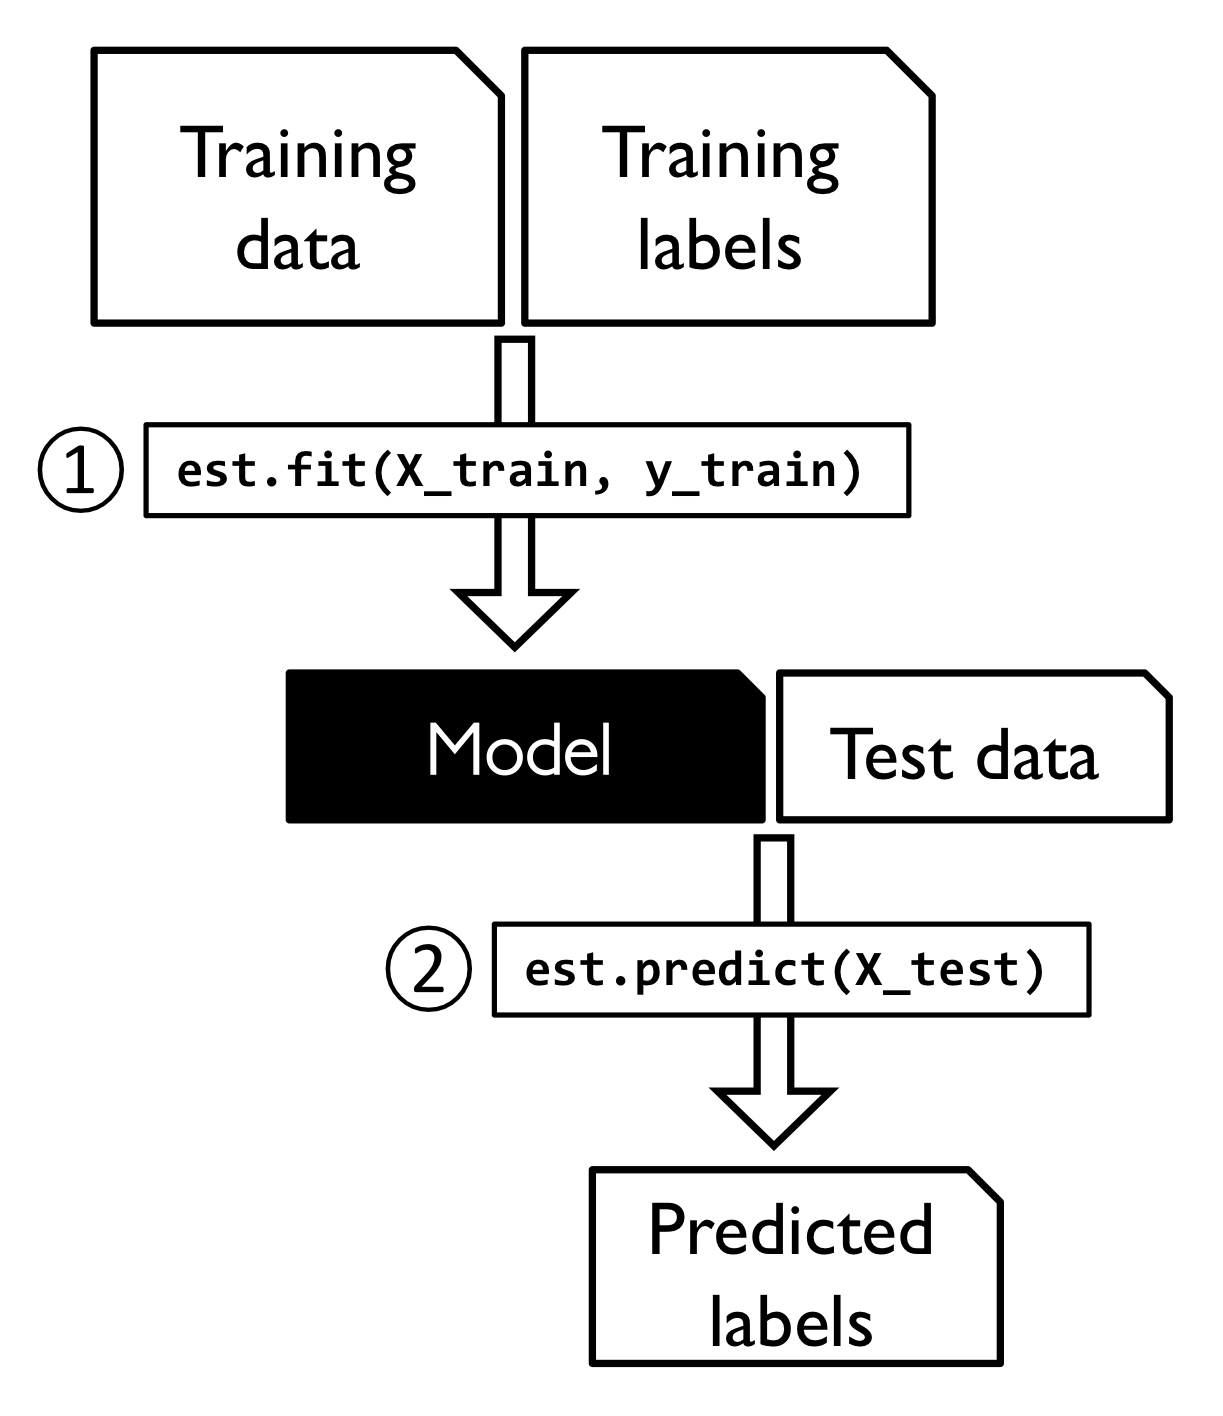

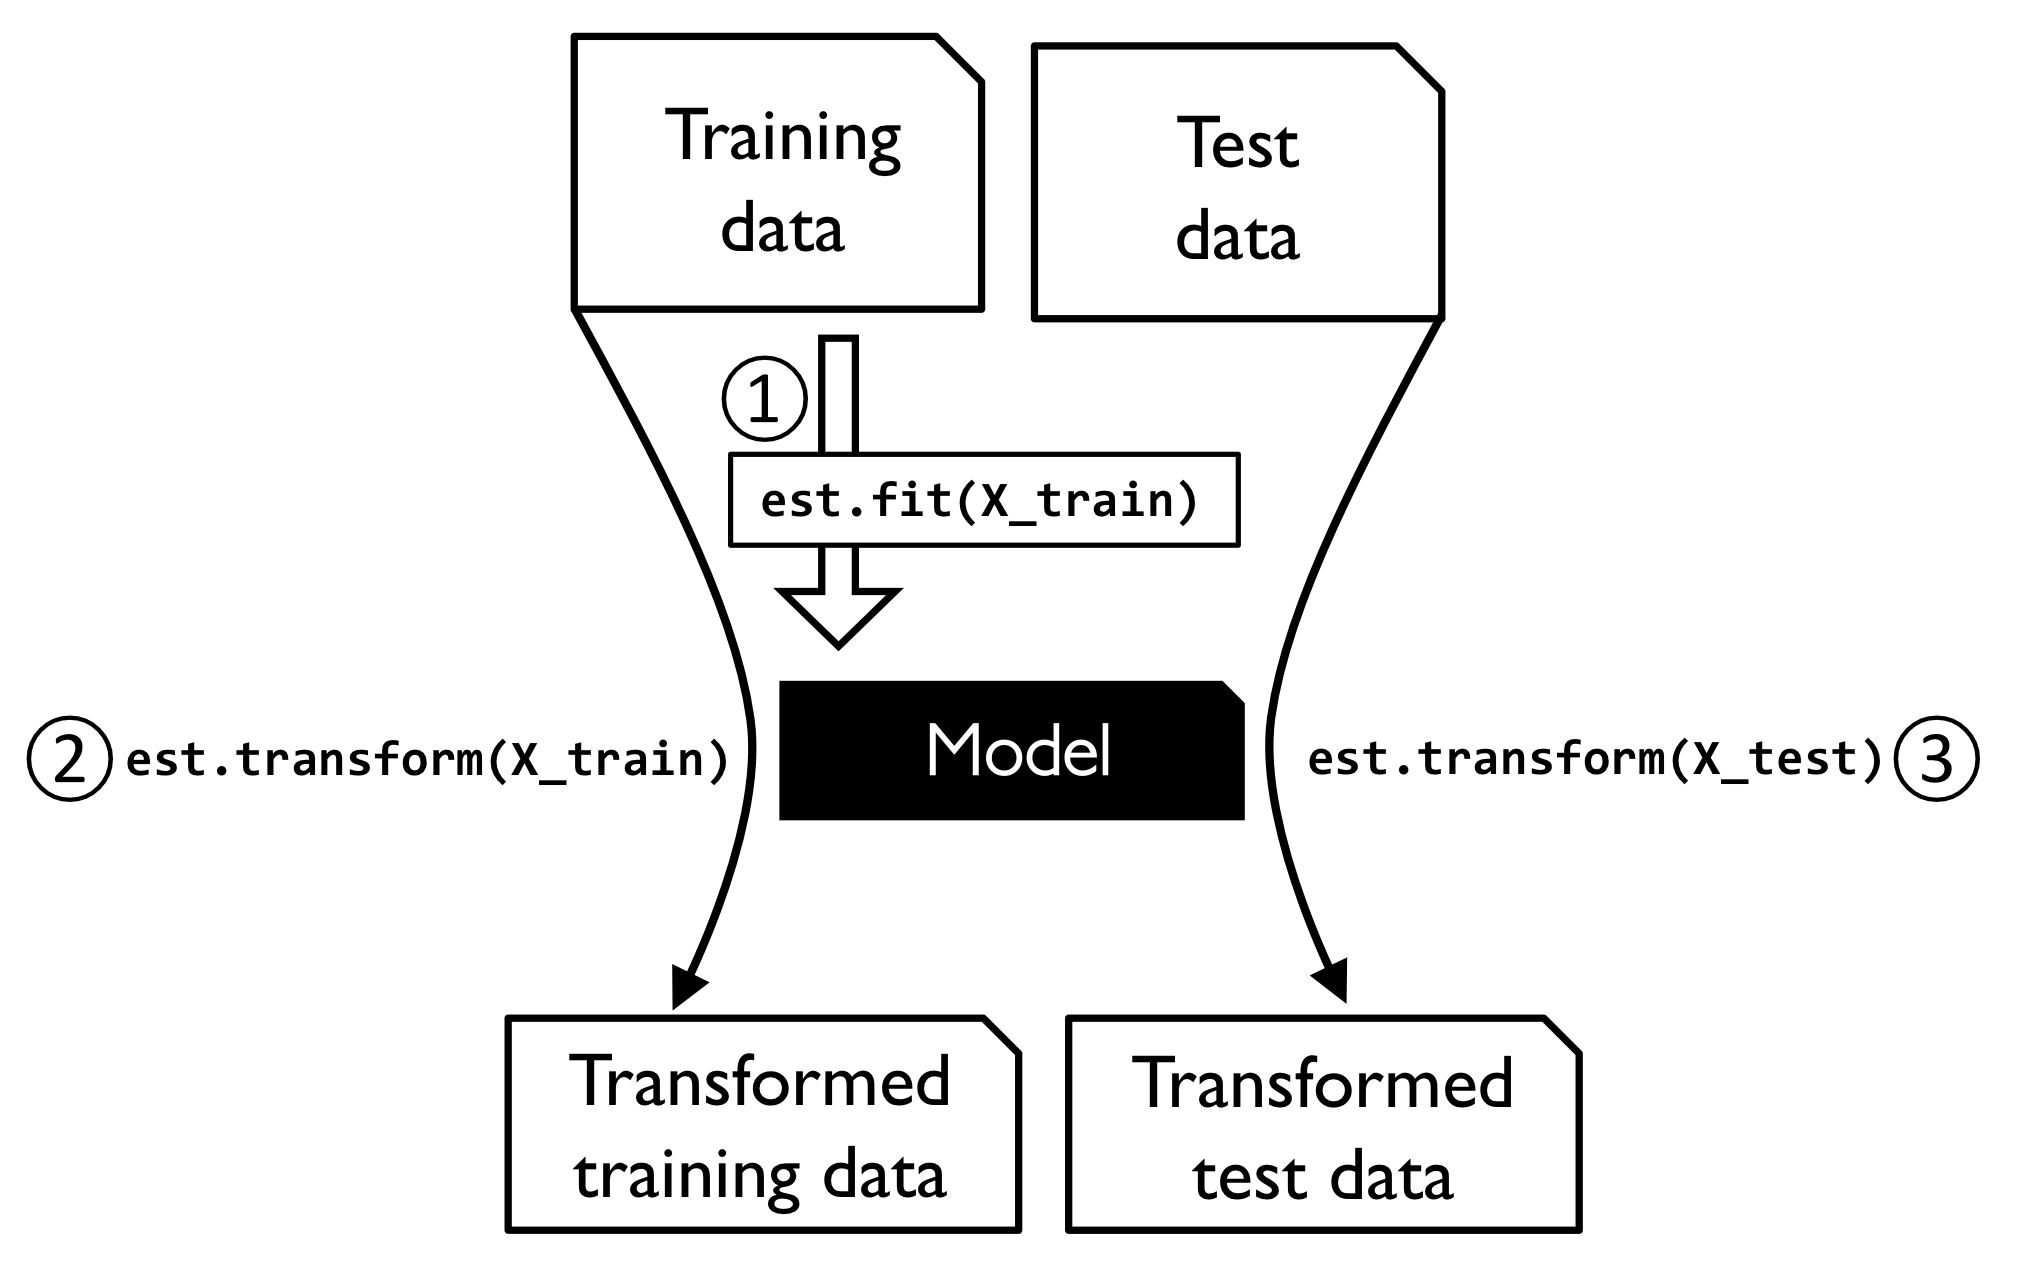

A particular **attention** is needed in the case of working with **Machine Learning** algorithms.

In fact, in this case, we have to underline that the *preprocessing* methods should be fit **only** on the training data, and not on all the dataset. 

This because the test set should **not** be seen until the final validation and must not affect the parameters of the preprocessing models.

Test data should be processed by the Scikit-learn object that has been fit (*trained*) on the training data **alone**.


## Pre-processing <a id="Preprocessing"></a>


### Data imputation and augmentation


#### Missing data

In some cases, the data comes to the analyst in the form of a dataset with features **already** defined. 

In some examples, **values** of some features can be **missing**. That often happens when the dataset was handcrafted, or when a **sensor** becomes inactive.

The typical approaches of dealing with missing values for a feature include the following ideas:

* **removing** the examples with missing features from the dataset (that can be done if your dataset is big enough so you can sacrifice some training examples);
	
*  using a **learning** algorithm that can **deal** with missing feature values (depends on a specific implementation of the algorithm);
	
*  using a **data imputation** technique.


#### Data imputation

We have already seen in a past lesson that Pandas has some methods to drop **missing data** or replace them with some suitable values.

However, Scikit-learn also exposes some useful classes for **data imputation}**. Specifically, it has two main functions:

1. `SimpleImputer`, which **replaces** missing values using a descriptive statistic(e.g. mean, median, or most frequent) along each column, or using a constant value;
	
2. `KNNImputer`, which **imputes** each sample's missing values by using the mean value from $K$ nearest neighbors found in the training set. 
By default, missing values are denoted using the `np.nan`. However, these classes works also with the `None` value or the Pandas `pd.NA`, or with a custom numerical value or string.


The main parameter for the `SimplerImputer` is `strategy`, to be chosen in between: `mean`(**default**), `median`, `most_frequent`, and `constant`. In this last case, missing values are replaced with the provided `fill_value` (0 by default).  

This class can be used as:

In [3]:
import numpy as np
from sklearn.impute import SimpleImputer

X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]

imp_mean = SimpleImputer(strategy='mean')
X_impm = imp_mean.fit_transform(X)
print(X_impm)

[[1. 2. 5.]
 [3. 4. 3.]
 [4. 6. 5.]
 [8. 8. 7.]]


The main parameter for the `KNNImputer` is the number `n_neighbors` of neighboring samples to use for imputation (5 by default). It is also possible to **weight** the neighboring samples and to call a specific **metric** function.

This class can be used as:

In [4]:
from sklearn.impute import KNNImputer

X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]

imp_knn = KNNImputer(n_neighbors=2)
X_impk = imp_knn.fit_transform(X)
print(X_impk)

[[1.  2.  4. ]
 [3.  4.  3. ]
 [5.5 6.  5. ]
 [8.  8.  7. ]]


#### Data augmentation

Data **augmentation** is the creation of altered copies of each instance within a training dataset. These techniques are particularly useful when the dataset contains **few** examples.

It is a common technique to **extend** of a data set by applying some transformations to the data that may appear different for an algorithm, but still contain the same meaning.

There exist lots of simple transformation that can be used on data, such as scaling, normalization, adding some kind of noise, and many others. Just to fix the idea, in the context of an image recognition problem, you can flip, rotate, scale, crop, or translate images.


### Data pre-processing


#### Handling categorical data

Not always the features are presented as *numerical* values. Ofter, they presents **categorical** data. This could represent a problem, since most of the ML algorithms usually work and accepts only numerical data. Hence, we have to learn to handle categorical data.

When working with categorical data, we can run into both **nominal** and **ordinal** features:

*  a **ordinal** feature has categorical values that can be **ordered** in some manner (e.g., a t-shirt size: $ S < M < L < XL $, etc.); 
	
*  a **nominal** feature has categorical values that does **not** present any order(e.g., the color of a car or similar).

In addition, often the class labels are available as a string or a character. Hence, we ha to **encode** it onto a unique number, usually as the sequence $0, 1, 2, ..., C-1$, where $C$ is the total number of classes.


#### Label encoding

In order to perform the **encoding** of class labels (usually a one-dimensional vector), we can use the simple `LabelEncoder` class of Scikit-learn:

In [5]:
y = ['M', 'F', 'F', 'M', 'F', 'M', 'M']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enc = le.fit_transform(y)
print(y_enc)

[1 0 0 1 0 1 1]


In [6]:
list(le.classes_)

['F', 'M']

In order to transform labels **back** to the original encoding, we can use:

In [7]:
list(le.inverse_transform([0, 0, 1, 0, 1]))

['F', 'F', 'M', 'F', 'M']

#### Handling ordinal feature

In a similar fashion, we can encode an ordinal feature (usually a bi-dimensional vector), by using the `OrdinalEncoder` class of Scikit-learn:

In [8]:
X = [['M'], ['S'], ['XL'], ['L'], ['S'], ['S'], ['M'], ['L'], ['XL'], ['L']]

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
X_enc = oe.fit_transform(X)
print(X_enc)

[[1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [1.]
 [0.]
 [3.]
 [0.]]


In [9]:
list(oe.categories_)

[array(['L', 'M', 'S', 'XL'], dtype=object)]

In [10]:
list(oe.inverse_transform([[2], [0], [1], [0], [3]]))

[array(['S'], dtype=object),
 array(['L'], dtype=object),
 array(['M'], dtype=object),
 array(['L'], dtype=object),
 array(['XL'], dtype=object)]

One limitation of the `OrdinalEncoder` class is that it **encodes** values in the sequence $0, 1, 2, ..., K-1$, if we have $K$ categories. If we need a different association, we have to manually **map** valued by using a dictionary.


The manual mapping is quite **simple** if data are in a Pandas DataFrame, as shown in the following example:

In [11]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2'],
                   ['red', 'S', 8.4, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']

size_mapping = {'XL': 4, 'L': 3, 'M': 2, 'S': 1}

df['size'] = df['size'].map(size_mapping)
df

color  size  price classlabel
0  green     2   10.1     class2
1    red     3   13.5     class1
2   blue     4   15.3     class2
3    red     1    8.4     class1

#### Handling nominal feature: one hot encoding

If an example has a *nominal* feature "colors" and this feature has **three** possible values: "red", "yellow" and "green", you can use the **one hot encoding** and transform this feature into a **vector** of three numerical values:
$$
\begin{split}
\text{\textcolor[rgb]{1,0,0}{red}}    &= \left[1, \, 0, \, 0 \right]  \\
\text{\textcolor[rgb]{0.2,0.8,0.2}{green}}  &= \left[0, \, 1, \, 0 \right]  \\
\text{\textcolor[rgb]{0,0,1}{blue}} &= \left[0, \, 0, \, 1 \right]  \\
\end{split}$$
By doing so, the dimensionality of the feature vectors is **increased**.

The **one hot encoding** can be implemented by using the `OneHotEncoder` class of Scikit-learn:

In [12]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
X_enc = ohe.fit_transform(X).toarray()
print(X_enc)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


As usual, the `inverse_transform()` method can retrieve the original values.


The **one hot encoding** can be also implemented directly in Pandas, by using the `get_dummies` method. This function will **convert** all the categorical variables, while leaves **unaltered** the numerical ones:

In [13]:
df = pd.get_dummies(df[['price', 'color', 'size']])
df

price  size  color_blue  color_green  color_red
0   10.1     2       False         True      False
1   13.5     3       False        False       True
2   15.3     4        True        False      False
3    8.4     1       False        False       True

The `get_dummies` method has transformed the nominal feature `color` and has replaced it with the new **three** dummy features: `color_blue`, `color_green`, and `color_red`.


#### Handling nominal feature: binary encoding

Sometimes, it could be useful to encode the nominal feature as a **binary** sequence (a sequence of **0** and **1**).

The *binary* encoding can be performed by using the `LabelBinarizer` and the `MultiLabelBinarizer` classes of Scikit-learn.

The use of these classes is **similar** to the previous ones:

In [14]:
from sklearn.preprocessing import LabelBinarizer

x = [1, 2, 6, 4, 2]
lb = LabelBinarizer()
y = lb.fit_transform(x)
print(y)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]]


In [15]:
from sklearn.preprocessing import MultiLabelBinarizer

X = [[1, 2], [6, 1], [4, 2]]
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(X)
print(Y)

[[1 1 0 0]
 [1 0 0 1]
 [0 1 1 0]]


#### Binning

An opposite situation, occurring less frequently in practice, is when you have a numerical feature but you want to convert it into a categorical one. **Binning** (also called *bucketing*) is the process of converting a continuous feature into multiple binary features called **bins** or **buckets**, typically based on value range.

**Binning** can be performed in Scikit-learn with the two classes `Binarizer` and `KBinsDiscretizer`.

The `Binarizer` class **binarizes** data (set feature values to 0 or 1) according to a *threshold*:

In [16]:
from sklearn.preprocessing import Binarizer

x = np.array([1, 2, 6, 4, 2])
bi = Binarizer(threshold=3.0)
y  = bi.fit_transform(x.reshape(-1, 1))
print(y)

[[0]
 [0]
 [1]
 [1]
 [0]]


Feature values **below** or **equal** to this are replaced by 0, **above** it by 1. 


Similarly, the `KBinsDiscretizer` class **bins** continuous data into intervals. 

The class accepts the number `n_bins` of **bins** to produce (by default it is set to 5). It also accepts the method used to encode the transformed result (by default it is the one hot encoding), to be chosen between the ordinal encoding and the one hot encoding. In addition, we can also chose the strategy used to define the **widths** of the bins:

* `uniform`: **all** bins in each feature have identical widths.
	
* `quantile`: **all** bins in each feature have the same number of points.
	
* `kmeans`: **values** in each bin have the same nearest center of a 1D *k*-means cluster.


In [17]:
from sklearn.preprocessing import KBinsDiscretizer

kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y  = kbd.fit_transform(x.reshape(-1, 1))
print(y)

[[0.]
 [0.]
 [2.]
 [1.]
 [0.]]


#### Splitting data into training and test sets

**Scikit-learn** has a useful function to **split** the data into a *training* set and a *test* set:

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

wine = datasets.load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

print(X_train.shape)
print(X_test.shape)

(119, 13)
(59, 13)


We have to specify with `test_size` the percentage of the *test* set size (for example the 33%, of consequence the *training* set is the 67%). 

By default, this function randomly **shuffle** the data (specify `shuffle=False` otherwise). The random shuffle can be controlled by setting the `random_state` parameter.

For imbalanced dataset, we can use the `stratify` option: the splits are made **according** to the class label proportion in `y`.


#### Normalization

Many ML algorithms need that all features are in similar scale. This can be done by the **normalization** or the **standardization** of the features.

The **normalization** is an operation mapping the feature values inside a suitable interval $[a, \, b]$, usually $[0, \, 1]$. This last is done for the $i$-th feature by:
$$
x^{(i)}_{norm} = \frac{x^{(i)} - x_{\min}}{x_{\max} - x_{\min}},
$$
where $x_{\min}$ and $x_{\max}$ are the *minimum* and *maximum* values of the $i$-th feature.

Although the **normalization** can be simply implemented in Python:

In [19]:
ex = np.array([0, 1, 2, 3, 4, 5])
ex_norm = (ex - ex.min())/(ex.max() - ex.min())
print(ex_norm)

[0.  0.2 0.4 0.6 0.8 1. ]


there is the `MinMaxScaler` class of Scikit-learn implementing this equation. This can be easily used as:

In [20]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(ex[:,np.newaxis])
ex_norm = mms.transform(ex[:,np.newaxis])
print(ex_norm)

[[0. ]
 [0.2]
 [0.4]
 [0.6]
 [0.8]
 [1. ]]


We can also use **directly** the `fit_transform()` method:

In [21]:
mms = MinMaxScaler()
ex_norm = mms.fit_transform(ex[:,np.newaxis])
print(ex_norm)

[[0. ]
 [0.2]
 [0.4]
 [0.6]
 [0.8]
 [1. ]]


If we need an interval different from $[0, \, 1]$, we can use:

We have to underline that the preprocessing methods should be fit **only** on the training data. This because the test set should **not** be seen until the final validation and must not affect the parameters of the preprocessing models.
Hence, the procedure to be followed is:

1. **split** the dataset into training and test sets;
	
2. **fit** the preprocessing model on the training set, **transforming** it;
	
3. **transform** separately the test set with the model fitted on the training set.

In Scikit-learn, this procedure is implemented as:

In [22]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm  = mms.transform(X_test)

#### Standardization

The **standardization** consists in making the feature to have **zero** mean and **unit** standard deviation. This can be made by:
$$
x^{(i)}_{std} = \frac{x^{(i)} - \mu_x}{\sigma_x},
$$
where $\mu_x$ and $\sigma_x$ are the mean and standard deviation of the $i$-th feature.

Again the standardization can be simply implemented in Python. However, we can use directly the `StandardScaler` of Scikit-learn:

In [23]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std  = stdsc.transform(X_test)

#### Outliers reduction

**Outlier** is a term used in statistics to define an anomalous or aberrant value in a set of observations. Preprocessing should also include **outlier removal** when possible.

Usually in large samples of data, some data will be more distant from the mean value. Thus a simple way, to remove outliers, is to assume **Gaussian** or near-Gaussian distribution model for the data.

A practical approach is to consider as outliers the:

*  elements larger than 3 times of standard deviations from the mean;
	
*  elements larger than 3 times of scaled median absolute deviations (**MAD**) from the median;
	
*  elements larger than 1.5 times of inter-quartile ranges above the upper quartile (75%) or below the lower quartile (25%).


This last idea is implemented in Scikit-learn by the `RobustScaler` class, which removes the **median** and scales the data according to the **quantile** range (usually between the 1-st and 3-rd):

In [24]:
from sklearn.preprocessing import RobustScaler

rsc = RobustScaler()
X_train_norm = rsc.fit_transform(X_train)
X_test_norm  = rsc.transform(X_test)

If we need to change the quantile range:


In [25]:
rsc = RobustScaler(quantile_range=(10.0, 90.0))

In addition, **noise reduction** is the process of removing noise from a signal or a data sequence. Noise is due to measurement errors or sensors thermal noise. Noise reduction is usually performed by filtering the feature data.


## Feature selection <a id="Feature_selection"></a>


### Supervised approach


#### Introduction on feature selection

One of the way to solve the overfitting problem is to **reduce** the data dimensionality. This could be done by selecting only a *subset* of the available features or by projecting them into a **new** set of reduced dimensionality.

There are several approaches for selecting a subset of "**good**" features, described in the following.

For example, for the regression problem, a simple idea is to see the **correlation** between the features and the target variable, and to select the **most** correlated ones. In the housing problem, we can evaluate the correlation of all the features withe respect to the house price and select a subset of $K<M$ most correlated features.

To **test** these methods for the classification problem, we can use the Wine dataset.


#### L1 regularization

A common method to automatically select a subset of features is to use the $L1$ regularization in the underlying optimization problem, which forces the solution to be **sparse**. This is meaning that an additional *regularization* term is added to the cost function to be optimized. For the $L1$ regularization, the additional term is:
$$
L1: \;\lambda\left\|\mathbf{w}\right\|_1 = \lambda\sum_{i=1}^M \left| w_i \right|,
$$
where the *regularization* parameter $\lambda$ set the **strength** of the regularization.

Many models in Scikit-learn can be used with the $L1$ regularization. It is sufficient to set the `penalty` variable to `l1` and chose the $C$ value, which is the **inverse** of *regularization* strength $\lambda$, and use the class normally:

For the LogistRegression class, the $L1$ regularization is not compatible with the default solver. Hence we set it to liblinear:

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
model.fit(X_train_std, y_train)

y_model = model.predict(X_test_std)
acc = accuracy_score(y_test, y_model)
print("Test accuracy: {}% ".format(round(100*acc, 2)))

Test accuracy: 96.61% 


In [27]:
print(model.coef_[0,:])  # only for first class

[0.22439375 0.         0.         0.         0.         0.
 0.50545986 0.         0.         0.         0.         0.
 1.48021504]


Only **three** features are different from zero (1st, 7th, and 13th) for the first class, corresponding to: alcohol, flavanoids, and proline.


#### Sequential Feature Selection

The Sequential Feature Selector **adds**(forward selection) or **removes** (backward selection) features to form a feature subset in a greedy fashion. 

At each stage, this estimator chooses the **best** feature to add or remove based on the *cross-validation* score of an estimator:

In [28]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3, direction='backward')
sfs.fit(X_train_std, y_train)

X_train_select = sfs.transform(X_train_std)
X_test_select  = sfs.transform(X_test_std)

knn.fit(X_train_select, y_train)

# Print selected features
print(sfs.get_feature_names_out(wine.feature_names))

['hue' 'od280/od315_of_diluted_wines' 'proline']


The **three** selected features were: alcohol, ash, and flavanoids.


#### Feature importance

Some estimators have a `feature_importances_` attribute that measures how a feature is **important** for the final decision. According to this attribute, we can select the most important (**best**) $K$ features.

Otherwise, if the estimator has not such an attribute, we can use directly the `coef_` attribute (or its **magnitude**): most important features have strong model weights.

Scikit-learn **normalizes** features importance so that they sum up to **one**, and hence each importance can be read as a percentage.

One of the models that have the `feature_importances_` attribute is the Random Forests. In the following we compute and show the features importance for the Wine dataset:

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_std, y_train)

importance = clf.feature_importances_
print(importance)

[0.10373078 0.02537746 0.01709222 0.02413422 0.03307519 0.06724997
 0.16878553 0.00756207 0.02722683 0.1017835  0.11503721 0.1021381
 0.20680692]


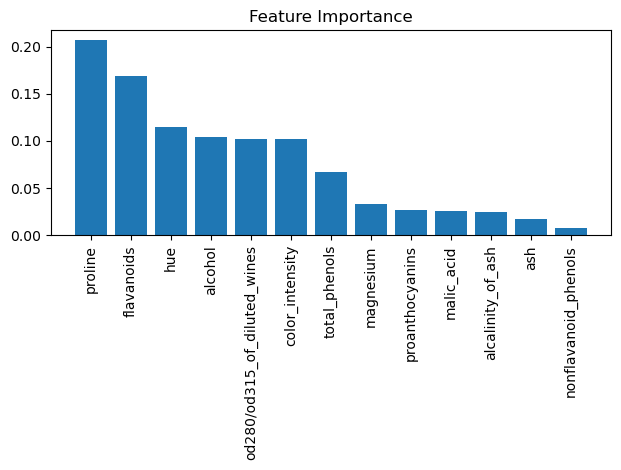

In [30]:
import matplotlib.pyplot as plt

indices = np.argsort(importance)[::-1]
feat_labels = wine.feature_names
feat_labels = [feat_labels[i] for i in indices]

plt.figure()
plt.bar(range(X.shape[1]), importance[indices], align='center')
plt.title('Feature Importance')
plt.xticks(range(X.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()

#### SelectFromModel

In order to avoid to **manually** select the features based on their importance, we can use the `SelectFromModel` class of Scikit-learn. This function accepts an estimator to be used and the *threshold* value to select the features.

By referring to the previous example:

In [31]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(clf, threshold=0.1, prefit=True)
X_select = sfm.transform(X_train_std)
print('Number of selected features:', X_select.shape[1])

Number of selected features: 6


We have used the `prefit=True` option since we have passed the Random Forests classifier `clf` already fitted.


#### Recursive feature elimination

Given an external estimator that assigns weights to features, the goal of recursive feature elimination (**RFE**) is to select features by recursively considering smaller and smaller sets of features. 

First, the estimator is trained on the initial set of features and the importance of each feature is obtained. Then, the **least** important features are **pruned** from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached:

In [32]:
from sklearn.feature_selection import RFE

selector = RFE(clf, n_features_to_select=5)
selector = selector.fit(X_train, y_train)

# Select only the selected features
X_train_select = selector.transform(X_train_std)
X_test_select  = selector.transform(X_test_std)

# Print selected features
print(selector.get_feature_names_out(wine.feature_names))

['alcohol' 'flavanoids' 'color_intensity' 'od280/od315_of_diluted_wines'
 'proline']


#### Recursive feature elimination with cross-validation

Similarly, we can use a recursive feature elimination exploiting the cross-validation idea.

This technique **automatically** returns the best number of features, ranked based on the *cross-validation*. It requires to set the **minimum** number of features to be selected (by default equal to **1**):

In [33]:
from sklearn.feature_selection import RFECV

selector = RFECV(clf, min_features_to_select=3, cv=5)
selector = selector.fit(X_train, y_train)

# Select only the selected features
X_train_select = selector.transform(X_train_std)
X_test_select  = selector.transform(X_test_std)

# Print selected features
print(selector.get_feature_names_out(wine.feature_names))

['alcohol' 'flavanoids' 'color_intensity' 'hue'
 'od280/od315_of_diluted_wines' 'proline']


#### Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. 

Among different methods offered by Scikit-learn, the `SelectKBest` removes **all but** the highest scoring features according to the selected statistical test. The available statistical tests are:
* **Regression**:
    1. `f_classif`(default): ANOVA F-value between label/feature;
		
    2. `chi2`: Chi-squared stats of non-negative features.
		
    3. `mutual_info_classif`: mutual information for a discrete target;		
	

* **Classification**:
    1. `f_regression`: F-value between label/feature;
		
    2. `r_regression`: Pearson correlation coefficient for each features and the target;
		
    3. `mutual_info_regression`: mutual information for a continuous target.
	

The general use of such a class is the following:

As an example, we use the Chi-squared statistical test, since all the feature are *non-negative*. Again we select only the first five features:

In [34]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=5)
X_select = selector.fit_transform(X_train, y_train)
print(X_select.shape[1])

5


### Unsupervised approach


#### Removing low-variance features

Other kinds of approaches are based only on the features themselves and do not rely on the target values.

A first idea is to **remove** all features that have a **low variance**, under a set *threshold*. The `VarianceThreshold` class of Scikit-learn implement this approach. Since this feature selection algorithm looks only at the features, and not the desired outputs, it can be used for unsupervised learning.

The `VarianceThreshold` class can be use simply:

In [35]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=1.0)
selector = selector.fit(X_train)

# Select only the selected features
X_train_select = selector.transform(X_train)
X_test_select  = selector.transform(X_test)

# Print selected features
print(selector.get_feature_names_out(wine.feature_names))

['malic_acid' 'alcalinity_of_ash' 'magnesium' 'flavanoids'
 'color_intensity' 'proline']


Obviously, the features **must not** be *standardized*. Otherwise, all features have **unit** variance.


## Feature extraction <a id="Feature_extraction"></a>


### Principal Component Analysis (PCA)


The *Principal Component Analysis* (**PCA**) aims to find an optimal linear transformation $\mathbf{y} = \mathbf{Wx}$, determining the **maximal variance** directions, as shown in the following figure.

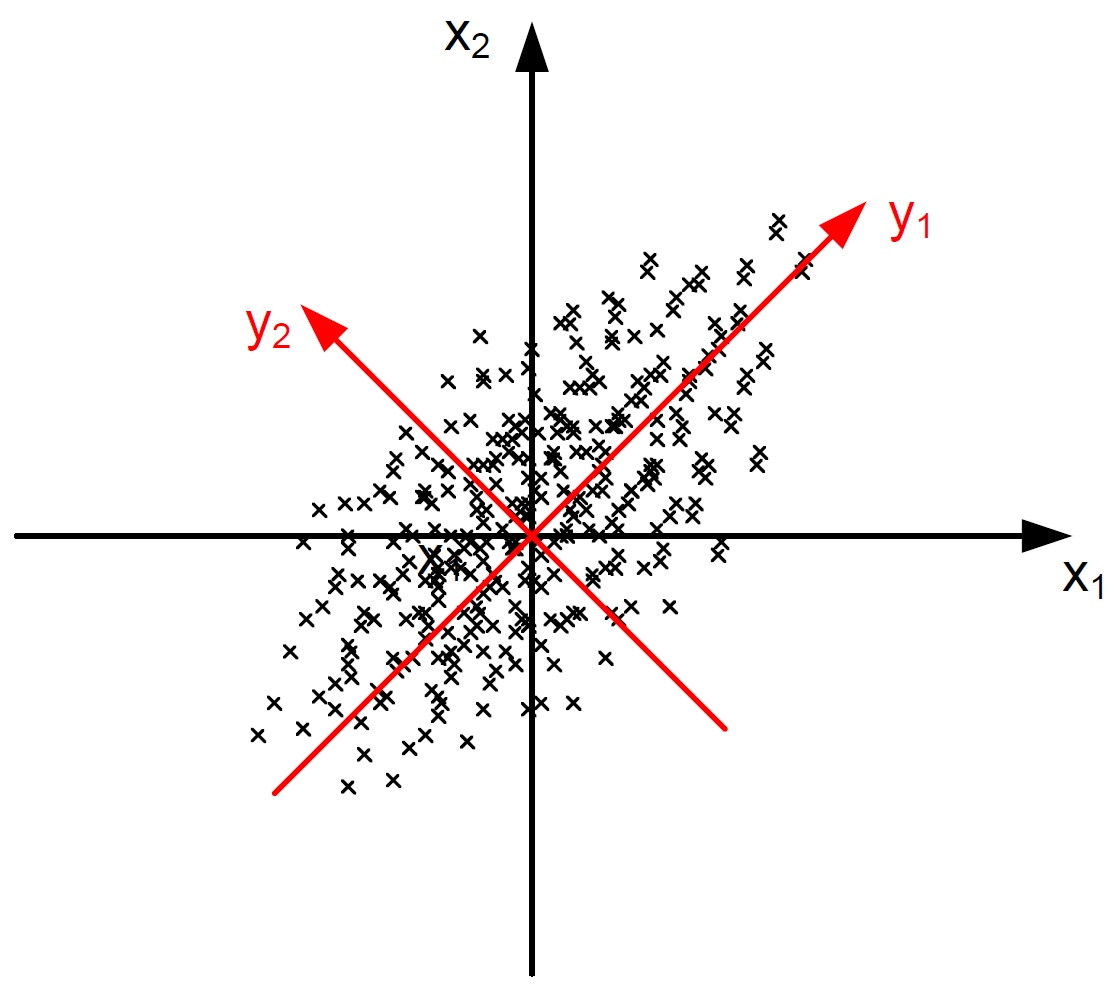

In other words, the **PCA** transforms a large number of input data into a set of components statistically uncorrelated (features) and sorted according to their information content.


Given $\mathbf{x} \in \mathbb{R}^M$, with $\mathbf{x} = \left[  x_1, x_2, ..., x_M \right]^T$ and autocorrelation matrix $\mathbf{R}_x = E\left\{ \mathbf{xx}^T \right\}$, let us pose $\mathbf{w}_1, \mathbf{w}_2, ..., \mathbf{w}_M$ the eigenvectors of the autocorrelation matrix $\mathbf{R}_x$, so that $\mathbf{w}_1$ corresponds to the **largest** eigenvalue $\lambda_1$ and so on until $\mathbf{w}_M$ corresponding to the **smallest** eigenvalue $\lambda_M$.

The *projection* of the input vector $\mathbf{x}$ on the unitary vector $\mathbf{w}_j$ identifies the $j$-th **principal direction** $y_j$ and, viceversa, we can use these to reconstruct the input:
$$
y_j = \mathbf{w}_j^T \mathbf{x}\quad\quad\Longleftrightarrow\quad\mathbf{x} = \sum_{j=1}^M \mathbf{w}_j y_j.
$$
These relations are known as the **analysis formula** and the **synthesis formula**, respectively.

For dimensional reduction, we can **truncate** to $K<M$ the expansion:
$$
\mathbf{x}' = \sum_{j=1}^{K}\mathbf{w}_j y_j, \qquad{\text{with}}\quad K < M.
$$


Scikit-learn has a useful function for evaluating the principal components. The main parameter to provide is the number of components to keep (`n_components`). 

If we provide $0 <$ `n_components` $< 1$, the function will select the number of components such that the amount of variance that needs to be explained is **greater** than the percentage specified by `n_components`:

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# pca = PCA(n_components=0.9)  # Keep 90
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca  = pca.transform(X_test_std)

print("Number of selected components:", pca.n_components_)
print("Percentage of variance explained:", sum(pca.explained_variance_ratio_))

clf = LogisticRegression()
clf.fit(X_train_pca, y_train)

acc = accuracy_score(y_test, y_model)
print("Test accuracy: {}%".format(round(100*acc,2)))

Number of selected components: 2
Percentage of variance explained: 0.5544052984765285
Test accuracy: 96.61%


Since we have reduced the number of features to only **two** components, we can visualize the decision regions.


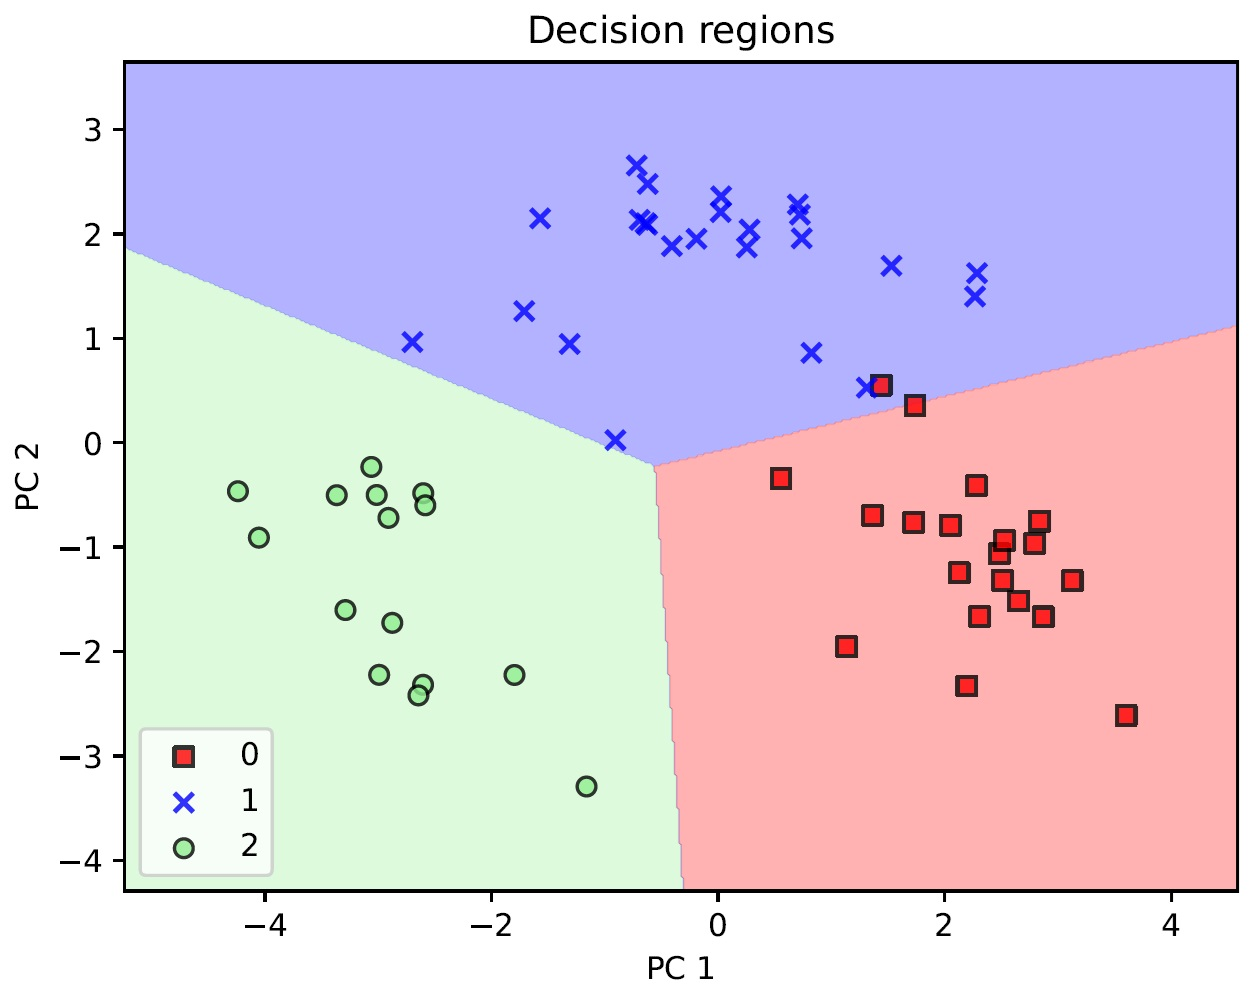

### Kernel PCA

One problem with **PCA** is that it assumes that the directions of variation are all straight lines. This is often **not true**. A solution consists in applying a (possibly nonlinear) function $\Phi\left( \cdot \right)$ to each datapoint $\mathbf{x}$ that transforms the data into the kernel space, and then perform normal linear PCA in that space. The covariance matrix is defined in the **kernel space** and is:
$$
\mathbf{K}_x = \frac{1}{N}\sum_{k=1}^N \Phi\left(\mathbf{x}_k \right)\cdot\Phi\left(\mathbf{x}_k \right)^T
$$
Usually, differently from the linear case, $\Phi \left(\mathbf{x}\right)$ is not zero-mean, hence the **kernel** matrix $\mathbf{K}_x$ should be normalized as:
$$
\mathbf{K}'_x = \mathbf{K}_x - \mathbf{1}_N \mathbf{K}_x -\mathbf{K}_x \mathbf{1}_N + \mathbf{1}_N \mathbf{K}_x \mathbf{1}_N
$$
where $\mathbf{1}_N$ denotes a $N \times N$ matrix for which each element takes value $1/N$.

hen, as in the linear case, data will be projected along the **directions** of the $M$ eigenvectors corresponding to the $M$ **largest** eigenvalues of the $\mathbf{K}_x$ matrix.


Scikit-learn has a useful function for evaluating the kernel principal components. The main parameters to provide are the number of components to keep (`n_components`), the kernel type (`kernel`), the kernel coefficient (`gamma`), and the degree for the polynomial kernel (`degree`). 

In order to visualize the effect on non-linearly separable patterns, we can use datasets composed of two interleaving half circles(obtained with the `make_moons()` function) and/or a large circle containing a smaller circle in two dimensions (obtained with the `make_circles()` function).

In next examples, we see that the Kernel PCA is able to transform a dataset that is nonlinearly separable into a new (**projected**) dataset that is linearly separable. On the other hand, the standard PCA is not able to recover the linear separability:

In [37]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.0, random_state=42)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)    # Evaluating PCA

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)  # Evaluating KPCA


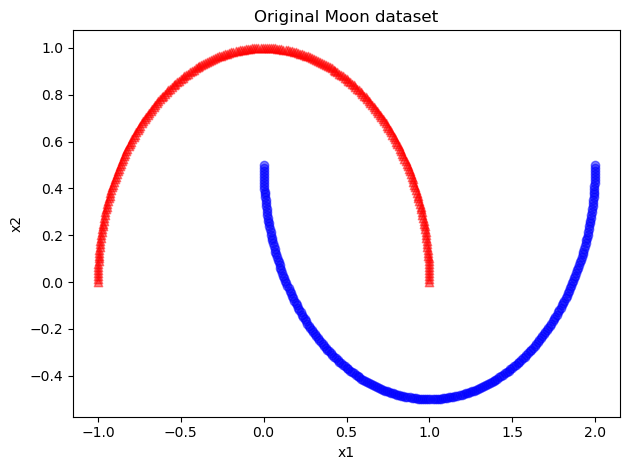

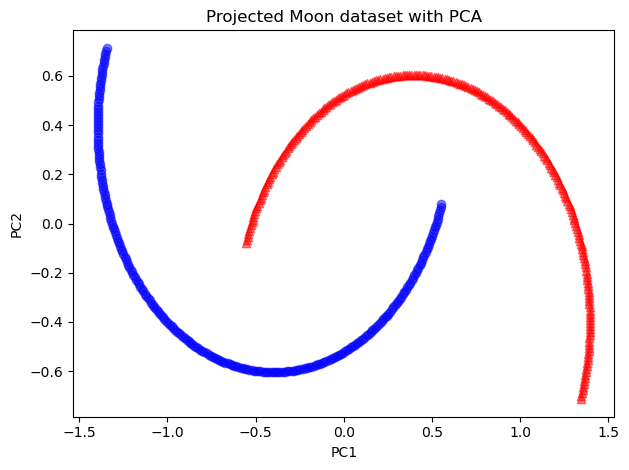

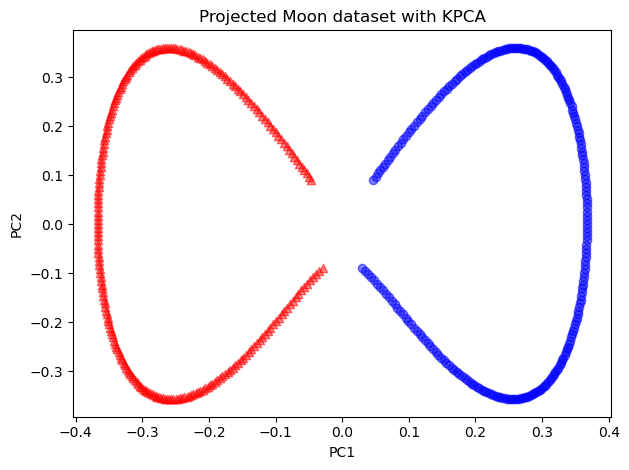

In [38]:
# Plotting the original dataset
plt.figure()
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.title('Original Moon dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()


# Plotting the projected dataset with PCA
plt.figure()
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)
plt.title('Projected Moon dataset with PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()


# Plotting the projected dataset with KPCA
plt.figure()
plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)
plt.title('Projected Moon dataset with KPCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()

In [39]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)    # Evaluating PCA

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=10)
X_kpca = kpca.fit_transform(X)  # Evaluating KPCA


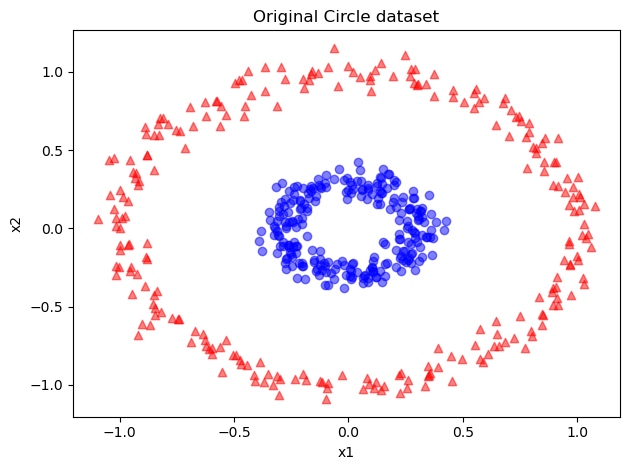

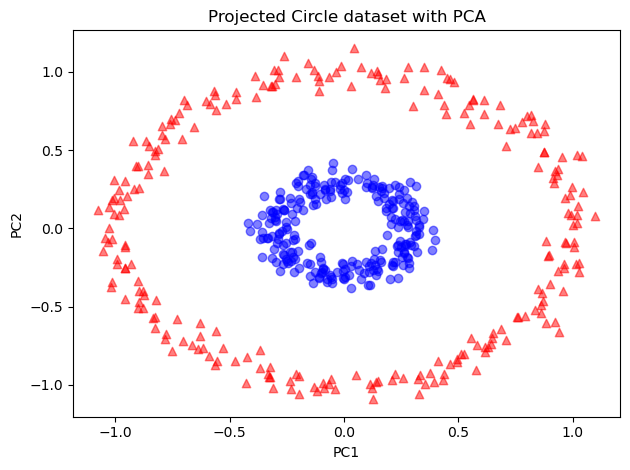

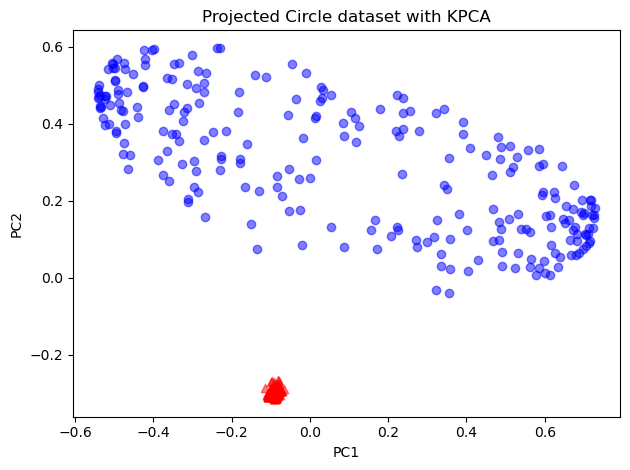

In [40]:
# Plotting the original dataset
plt.figure()
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.title('Original Circle dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()


# Plotting the projected dataset with PCA
plt.figure()
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)
plt.title('Projected Circle dataset with PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()


# Plotting the projected dataset with KPCA
plt.figure()
plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)
plt.title('Projected Circle dataset with KPCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()

### Linear Discriminant Analysis (LDA)

Figure below shows a simple two-dimensional dataset consisting of **two** classes. We can compute various statistics about the data: the means of each class in the data, $\boldsymbol{\mu}_i$, the mean of the entire dataset $\boldsymbol{\mu}$, and the covariance of each class with itself $\boldsymbol{\Sigma}_i$.


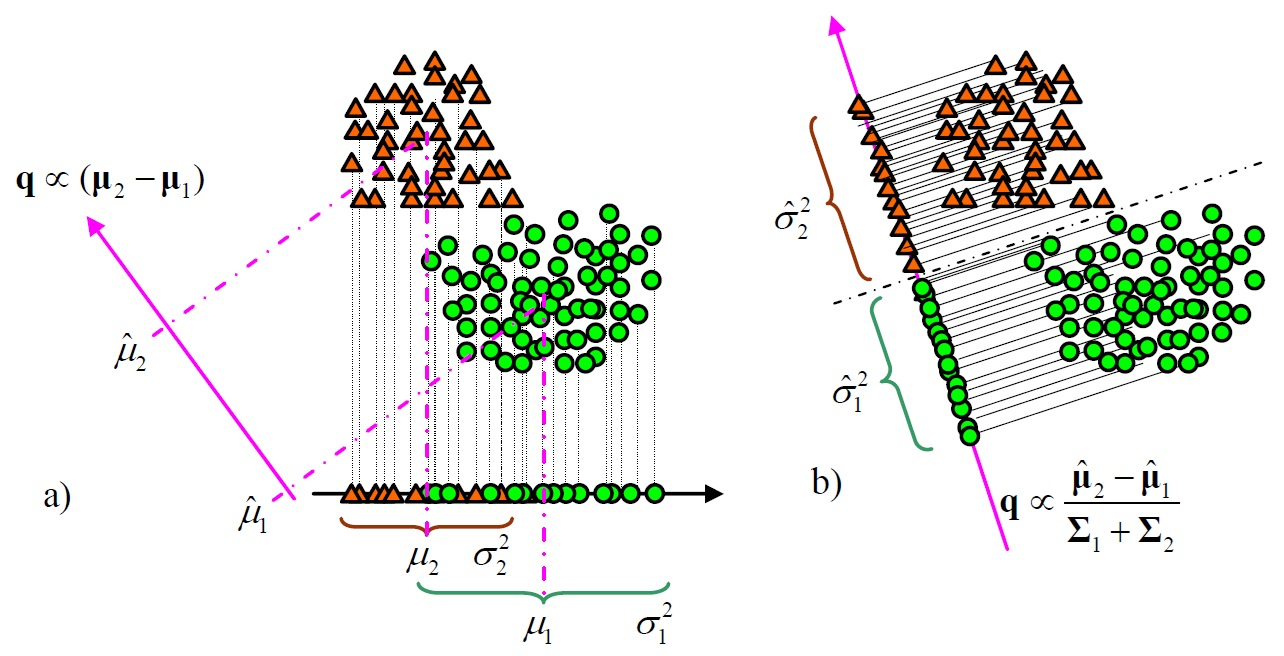

The principal insight of **Linear Discriminant Analysis** (**LDA**) is that the covariance matrix can tell us about the scatter **within** a dataset, which is the amount of spread that there is **within** the data.

Let use denote with $\mathbf{S}_W$ the **within covariance** matrix (the **sum** of the covariances of each class) and with $\mathbf{S}_B$ the estimated **between covariance** matrix.

The argument about **good** separation suggests that datasets that are easy to separate into the different classes should have the ratio $\mathbf{S}_B/\mathbf{S}_W$ as large as possible. Figure shows two projections of the dataset onto a straight line.


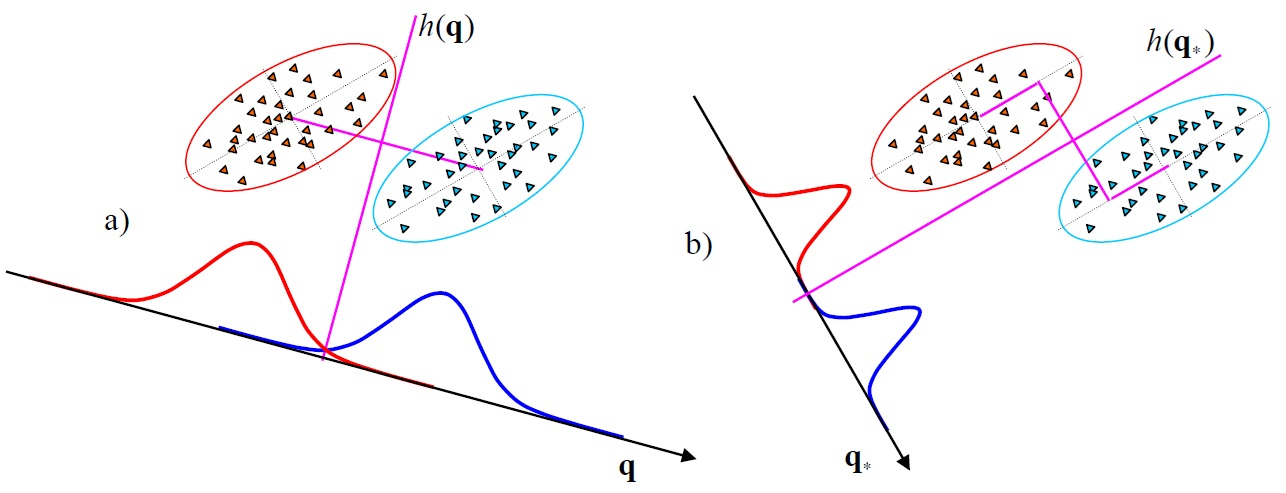

Remember that any line can be written as a vector $\mathbf{q}$ (it is one row of weight matrix $\mathbf{Q}$). The projection of the data can be written as $\mathbf{z} = \mathbf{q}^T \cdot \mathbf{x}$ for datapoint $\mathbf{x}$. 

Hence, we have to **solve** the following problem:
$$
\mathop{\mathrm{argmax}}\limits_{\mathbf{Q}}\left\{\frac{\mathbf{Q}^T \mathbf{S}_B \mathbf{Q}}{\mathbf{Q}^T \mathbf{S}_W \mathbf{Q}}\right\}
$$

Scikit-learn has a useful function for evaluating the linear discriminants. The main parameter to provide is the number of components to keep (`n_components`). 

Differently from the PCA, **LDA** is supervised since we have to know the classes. Hence, we have to provide also the `y` vector to the `fit` method:

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda  = lda.transform(X_test_std)
print("Percentage of variance explained:", sum(lda.explained_variance_ratio_))
		
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

acc = accuracy_score(y_test, y_model)
print("Test accuracy: {}%".format(round(100*acc,2)))

Percentage of variance explained: 1.0
Test accuracy: 96.61%


Since we have reduced the number of features to only **two** components, we can visualize the decision regions.


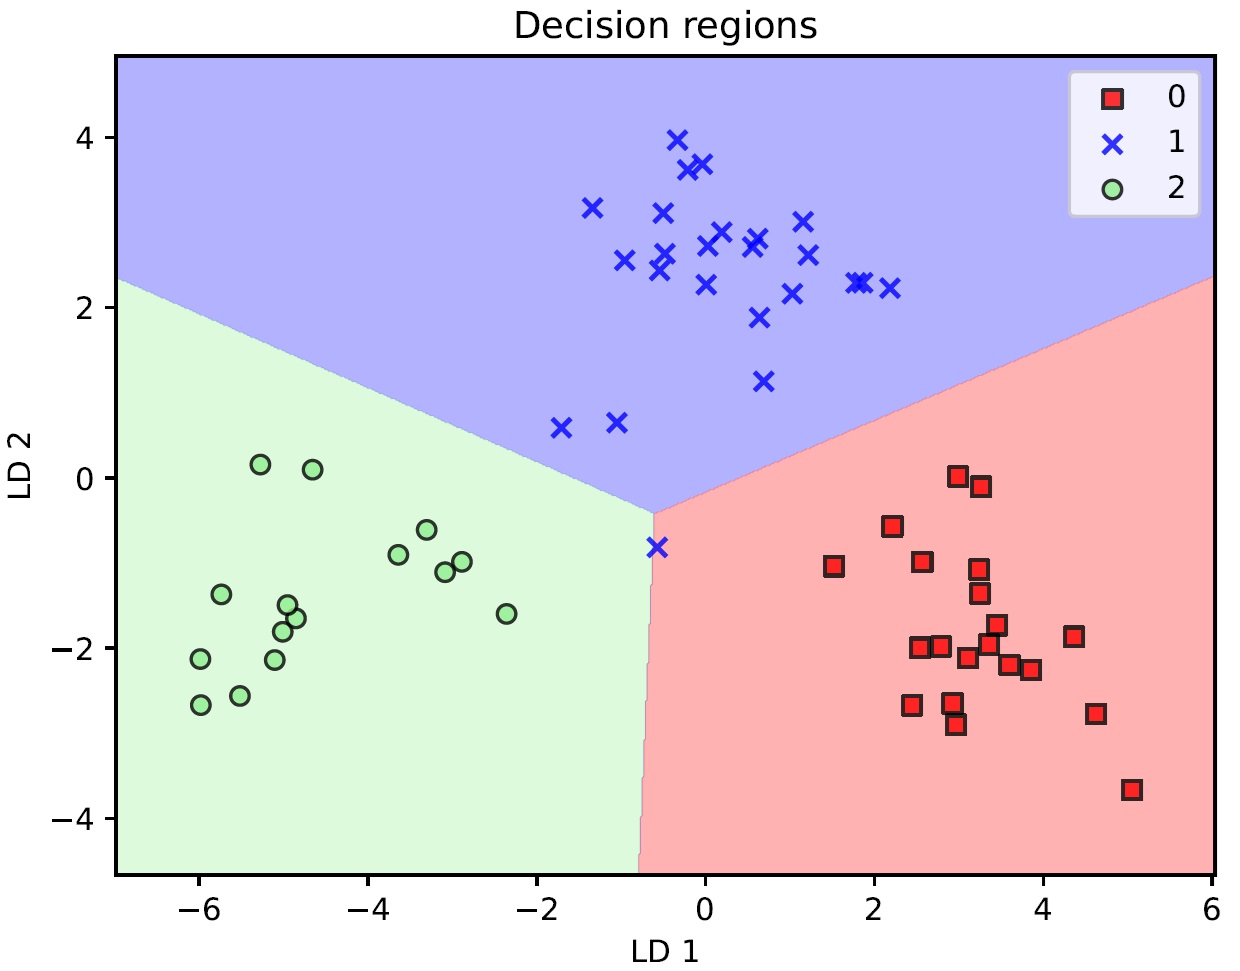

### High-dimensional data visualization


#### Manifold learning

There are many other approaches to nonlinear dimensionality reduction, generally known in literature as **Manifold Learning**. This kind of algorithms are based on the idea that the dimensionality of many datasets is only artificially high.

High-dimensional datasets can be very **difficult** to visualize, while data in **two** or **three** dimensions can be plotted to show the inherent structure of the data. Hence, to aid visualization of the structure of a dataset, the dimension must be reduced in some way.

Manifold Learning can be thought of as an attempt to generalize linear frameworks like PCA or LDA to be sensitive to nonlinear structure in data, such as done in kernel PCA. 

Although supervised variants exist, the typical manifold learning problem is **unsupervised**: it learns the high-dimensional structure of the data from the data itself, without the use of predetermined classifications.


There are **several** methods of manifold learning:

* **Multidimensional scaling** (**MDS**): it seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space. MDS is generally used for analyzing similarity or dissimilarity in data. 
	
* **Isomap**: it can be viewed as an extension of MDS or KPCA, which seeks a lower-dimensional embedding that maintains geodesic distances between all points. 
	
* **Locally linear embedding** (**LLE**): it seeks a lower-dimensional projection of the data which **preserves** distances within local neighborhoods. It can be thought of as a series of local PCA that are globally compared to find the best nonlinear embedding.
	
* **Spectral Embedding**: it is an approach to calculating a nonlinear embedding by using a spectral decomposition of the graph **Laplacian**.

* **t-SNE**: it converts affinities of data points to probabilities. The affinities in the original space are represented by Gaussian joint probabilities and the affinities in the embedded space are represented by Student's t-distributions.


All these approaches are implemented in Scikit-learn, with a **similar** syntax. A common parameter is the number of component (`n_components`), which represents the dimension of the **embedded** space. By default, it is set to **2**, in order to make a plot of the embedding.


Dimension of input space: 64
Dimension of embedded space: 2


Text(0, 0.5, 'c2')

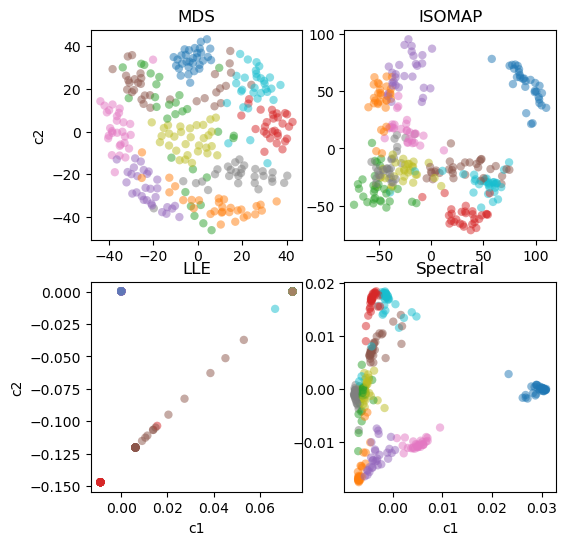

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding

# Loading the dataset (from sklearn)
digits = datasets.load_digits()
X = digits.data
y = digits.target


# Performing the MDS embeddings
mds = MDS(n_components=2, normalized_stress='auto')
X_mds = mds.fit_transform(X[:300])

# Performing the ISOMAP embeddings
isomap = Isomap(n_components=2, n_neighbors=15)
X_isomap = isomap.fit_transform(X[:300])

# Performing the Locally linear embedding (LLE) embeddings
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X[:300])

# Performing the Spectral Embedding (SE) embeddings
se = SpectralEmbedding(n_components=2)
X_se = se.fit_transform(X[:300])

print("Dimension of input space:", X.shape[1])
print("Dimension of embedded space:", X_mds.shape[1])


# Plot all embeddings
fig, ax = plt.subplots(2, 2, figsize=(6 ,6))
ax[0, 0].set_title("MDS")
ax[0, 0].scatter(X_mds[:, 0], X_mds[:, 1], c=y[:300], 
            edgecolor='none', alpha=0.5, cmap='tab10')
ax[0, 1].set_title ("ISOMAP")
ax[0, 1].scatter(X_isomap[:, 0], X_isomap[:, 1], c=y[:300], 
            edgecolor='none', alpha=0.5, cmap='tab10')
ax[1, 0]. set_title ("LLE")
ax[1, 0].scatter(X_lle[:, 0], X_lle[:, 1], c=y[:300], 
            edgecolor='none', alpha=0.5, cmap='tab10')
ax[1, 1]. set_title ("Spectral")
ax[1, 1].scatter(X_se[:, 0], X_se[:, 1], c=y[:300], 
            edgecolor='none', alpha=0.5, cmap='tab10')

ax[1, 1]. set_xlabel ("c1")
ax[1, 0]. set_xlabel ("c1")
ax[0, 0]. set_ylabel ("c2")
ax[1, 0]. set_ylabel ("c2")

#### T-distributed Stochastic Neighbor Embedding (t-SNE)

In the next slide, we show an example of the t-SNE approaches, used to visualize the digit dataset (originally lying in a 64-dimensional space) in a bi-dimensional embedding.


Dimension of input space: 64
Dimension of embedded space: 2


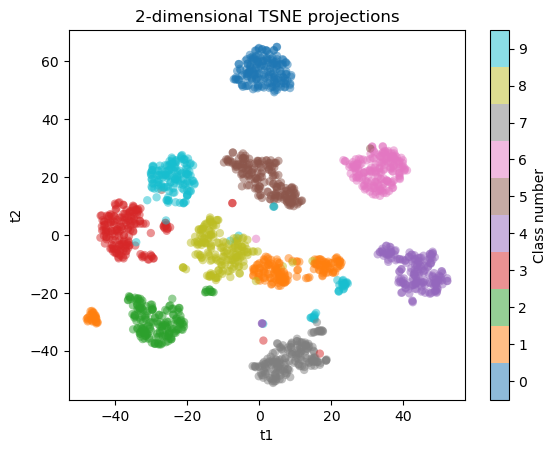

In [42]:
from sklearn.manifold import TSNE

# Loading the dataset (from sklearn)
digits = datasets.load_digits()
X = digits.data
y = digits.target

tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(X)

print("Dimension of input space:", X.shape[1])
print("Dimension of embedded space:", X_embedded.shape[1])

# Visualizing the embedded space
plt.figure()
sc = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, 
            edgecolor='none', alpha=0.5, cmap='tab10')
plt.xlabel('t1')
plt.ylabel('t2')
plt.title('2-dimensional TSNE projections')
cb = plt.colorbar(sc, label='Class number', ticks=range(10))
# cb.set_ticklabels(np.arange(1,11))
plt.clim(-0.5, 9.5)

The previous code snippet shows that the t-SNE approach has effectively **reduced** the $8 \times 8 = 64$ dimensions of the input space (the image pixels) to only 2 dimensions. This approach can be applied to an arbitrary dimension of the input space. However, if the dimension is very high and the number of patterns is huge, the computational cost of the t-SNE could be **very high**.

The result of t-SNE applied to the digit dataset is shown in the following figure, which highlights that the single numbers usually make **clusters** and hence can be classified by a good classifier. Similar results have been obtained also for the MNIST dataset (of dimension $28 \times 28 = 784$).

## References <a id="References"></a>

1. Sebastian Raschka and Vahid Mirjalili, Python Machine Learning - Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2, Third Edition, Packt Publishing, 2019.
2. Sebastian Raschka and Vahid Mirjalili, Machine Learning con Python - Costruire algoritmi per generare conoscenza, Seconda edizione, Apogeo, 2020.
3. Aurélien Géron, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, O'Reilly Media, 2nd edition, 2019.
4. Jake VanderPlas, A Whirlwind Tour of Python, O'Reilly Media, 2016 (<https://jakevdp.github.io/WhirlwindTourOfPython/>).
5. Jake VanderPlas, Python Data Science Handbook: Essential Tools for Working with Data, O'Reilly Media, 2016.
